###  Groupe 2 : Section étude de données
### Membres du groupe

#### Membre 1 : Mohamed BOUBACAR BOUREIMA
CIP : BOUM3688

#### Membre 2 : Abdou Rahime DAOUDA 
CIP : DAOA2504

#### Membre 3 : Abdoul Madjid SANOUSSI LABO
CIP : SANA2909

# Chargé du Cours: Monsieur Etienne Gael Tajeuna

### Importation des packages

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_distances
from sklearn.preprocessing import StandardScaler

import warnings
# Ignorer les avertissements
warnings.filterwarnings('ignore')

#Garder constant l'alleatoire
random.seed(2000)

### Chargement des données

In [2]:
#Lecture des données
data = pd.read_csv("data.csv")
labels = pd.read_csv("labels.csv")

In [3]:
data.head()

Unnamed: 0  gene_0    gene_1    gene_2    gene_3     gene_4  gene_5  \
0   sample_0     0.0  2.017209  3.265527  5.478487  10.431999     0.0   
1   sample_1     0.0  0.592732  1.588421  7.586157   9.623011     0.0   
2   sample_2     0.0  3.511759  4.327199  6.881787   9.870730     0.0   
3   sample_3     0.0  3.663618  4.507649  6.659068  10.196184     0.0   
4   sample_4     0.0  2.655741  2.821547  6.539454   9.738265     0.0   

     gene_6    gene_7  gene_8  ...  gene_20521  gene_20522  gene_20523  \
0  7.175175  0.591871     0.0  ...    4.926711    8.210257    9.723516   
1  6.816049  0.000000     0.0  ...    4.593372    7.323865    9.740931   
2  6.972130  0.452595     0.0  ...    5.125213    8.127123   10.908640   
3  7.843375  0.434882     0.0  ...    6.076566    8.792959   10.141520   
4  6.566967  0.360982     0.0  ...    5.996032    8.891425   10.373790   

   gene_20524  gene_20525  gene_20526  gene_20527  gene_20528  gene_20529  \
0    7.220030    9.119813   12.003135    9.650743    8.921326    5.286759   
1    6.256586    8.381612   12.674552   10.517059    9.397854    2.094168   
2    5.401607    9.911597    9.045255    9.788359   10.090470    1.683023   
3    8.942805    9.601208   11.392682    9.694814    9.684365    3.292001   
4    7.181162    9.846910   11.922439    9.217749    9.461191    5.110372   

   gene_20530  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  

[5 rows x 20532 columns]

In [4]:
labels.head()

Unnamed: 0 Class
0   sample_0  PRAD
1   sample_1  LUAD
2   sample_2  PRAD
3   sample_3  PRAD
4   sample_4  BRCA

### Exploration et statistiques descriptives de données 

In [5]:
data.describe()

gene_0      gene_1      gene_2      gene_3      gene_4  gene_5  \
count  801.000000  801.000000  801.000000  801.000000  801.000000   801.0   
mean     0.026642    3.010909    3.095350    6.722305    9.813612     0.0   
std      0.136850    1.200828    1.065601    0.638819    0.506537     0.0   
min      0.000000    0.000000    0.000000    5.009284    8.435999     0.0   
25%      0.000000    2.299039    2.390365    6.303346    9.464466     0.0   
50%      0.000000    3.143687    3.127006    6.655893    9.791599     0.0   
75%      0.000000    3.883484    3.802534    7.038447   10.142324     0.0   
max      1.482332    6.237034    6.063484   10.129528   11.355621     0.0   

           gene_6      gene_7      gene_8      gene_9  ...  gene_20521  \
count  801.000000  801.000000  801.000000  801.000000  ...  801.000000   
mean     7.405509    0.499882    0.016744    0.013428  ...    5.896573   
std      1.108237    0.508799    0.133635    0.204722  ...    0.746399   
min      3.930747    0.000000    0.000000    0.000000  ...    2.853517   
25%      6.676042    0.000000    0.000000    0.000000  ...    5.454926   
50%      7.450114    0.443076    0.000000    0.000000  ...    5.972582   
75%      8.121984    0.789354    0.000000    0.000000  ...    6.411292   
max     10.718190    2.779008    1.785592    4.067604  ...    7.771054   

       gene_20522  gene_20523  gene_20524  gene_20525  gene_20526  gene_20527  \
count  801.000000  801.000000  801.000000  801.000000  801.000000  801.000000   
mean     8.765891   10.056252    4.847727    9.741987   11.742228   10.155271   
std      0.603176    0.379278    2.382728    0.533898    0.670371    0.580569   
min      6.678368    8.669456    0.000000    7.974942    9.045255    7.530141   
25%      8.383834    9.826027    3.130750    9.400747   11.315857    9.836525   
50%      8.784144   10.066385    5.444935    9.784524   11.749802   10.191207   
75%      9.147136   10.299025    6.637412   10.082269   12.177852   10.578561   
max     11.105431   11.318243    9.207495   11.811632   13.715361   11.675653   

       gene_20528  gene_20529  gene_20530  
count  801.000000  801.000000  801.000000  
mean     9.590726    5.528177    0.095411  
std      0.563849    2.073859    0.364529  
min      7.864533    0.593975    0.000000  
25%      9.244219    4.092385    0.000000  
50%      9.566511    5.218618    0.000000  
75%      9.917888    6.876382    0.000000  
max     12.813320   11.205836    5.254133  

[8 rows x 20531 columns]

#### Fonction d'affichage des nombres, taux, types des valeurs manquantes et aussi le nombre des valeurs uniques par attribut.

In [4]:
def desc_data(name, my_dataset):
    nbuniques = my_dataset.nunique()
    nb_m = my_dataset.isnull().sum().sort_values()
    ratio_m = (my_dataset.isnull().sum()/my_dataset.shape[0]).sort_values()
    manquant = pd.concat([nb_m, ratio_m], axis=1, sort=False)
    df = pd.DataFrame({'Types': my_dataset[list(manquant.index.values)].dtypes,
                       'Nb_Uniques': nbuniques,
                       'Nb manquants': nb_m,
                       'Ratio manquants%': ratio_m,})
    print("Jeu de données : ",name)
    return df,ratio_m.sum(),nb_m.sum()

In [11]:
info=desc_data("Data", data)
info[0].head(80000)

Jeu de données :  Data


Types  Nb_Uniques  Nb manquants  Ratio manquants%
Unnamed: 0   object         801             0               0.0
gene_0      float64          36             0               0.0
gene_1      float64         770             0               0.0
gene_10     float64         415             0               0.0
gene_100    float64         799             0               0.0
...             ...         ...           ...               ...
gene_9995   float64         793             0               0.0
gene_9996   float64         155             0               0.0
gene_9997   float64         642             0               0.0
gene_9998   float64         149             0               0.0
gene_9999   float64         799             0               0.0

[20532 rows x 4 columns]

In [6]:
print( 'Total ratio = ', info[1])
print( 'Total valeurs manquantes = ', info[2])
print("Nombre d'occurence de la valeur 0 pour la variable gene_0 = ",np.sum(data['gene_0']>0))

Total ratio =  0.0
Total valeurs manquantes =  0
Nombre d'occurence de la valeur 0 pour la variable gene_0 =  35


#### Concatener les données avec leurs labels

In [9]:
# Concatenate based on 'key_column'
Full_Data = pd.merge(data, labels, on='Unnamed: 0', how='outer').reset_index(drop=True)

#On supprime la colonne Unnamed car on en a pas besoin
Full_Data=Full_Data.drop('Unnamed: 0', axis=1)

In [10]:
Full_Data.head()

gene_0    gene_1    gene_2    gene_3     gene_4  gene_5    gene_6  \
0     0.0  2.017209  3.265527  5.478487  10.431999     0.0  7.175175   
1     0.0  0.592732  1.588421  7.586157   9.623011     0.0  6.816049   
2     0.0  3.511759  4.327199  6.881787   9.870730     0.0  6.972130   
3     0.0  3.663618  4.507649  6.659068  10.196184     0.0  7.843375   
4     0.0  2.655741  2.821547  6.539454   9.738265     0.0  6.566967   

     gene_7  gene_8  gene_9  ...  gene_20522  gene_20523  gene_20524  \
0  0.591871     0.0     0.0  ...    8.210257    9.723516    7.220030   
1  0.000000     0.0     0.0  ...    7.323865    9.740931    6.256586   
2  0.452595     0.0     0.0  ...    8.127123   10.908640    5.401607   
3  0.434882     0.0     0.0  ...    8.792959   10.141520    8.942805   
4  0.360982     0.0     0.0  ...    8.891425   10.373790    7.181162   

   gene_20525  gene_20526  gene_20527  gene_20528  gene_20529  gene_20530  \
0    9.119813   12.003135    9.650743    8.921326    5.286759         0.0   
1    8.381612   12.674552   10.517059    9.397854    2.094168         0.0   
2    9.911597    9.045255    9.788359   10.090470    1.683023         0.0   
3    9.601208   11.392682    9.694814    9.684365    3.292001         0.0   
4    9.846910   11.922439    9.217749    9.461191    5.110372         0.0   

   Class  
0   PRAD  
1   LUAD  
2   PRAD  
3   PRAD  
4   BRCA  

[5 rows x 20532 columns]

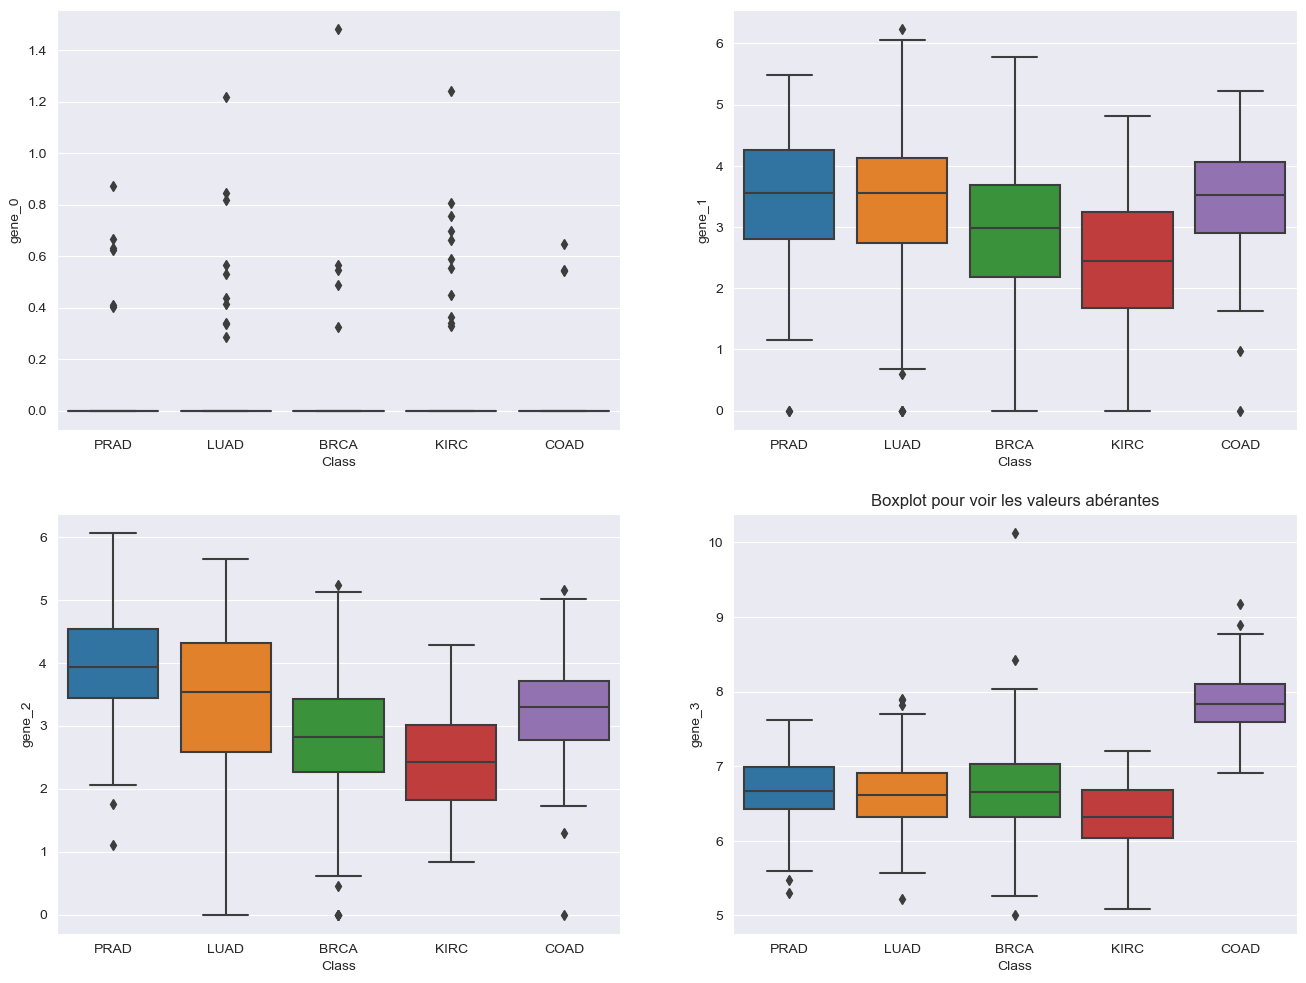

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
plt.title("Boxplot pour voir les valeurs abérantes")
sns.boxplot(x='Class', y='gene_0',data=Full_Data, ax=axes[0,0])
sns.boxplot(x='Class', y='gene_1', data=Full_Data, ax=axes[0,1])
sns.boxplot(x='Class', y='gene_2',data=Full_Data, ax=axes[1,0])
sns.boxplot(x='Class', y='gene_3', data=Full_Data, ax=axes[1,1])


plt.show()

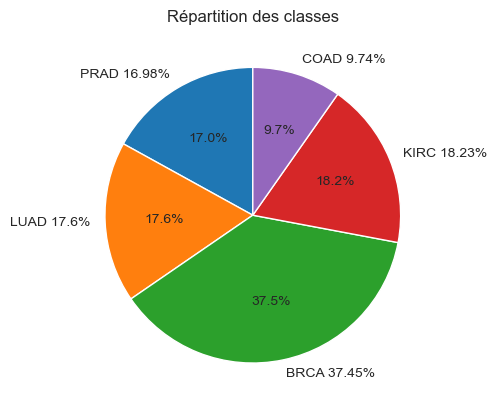

In [12]:
labels_class = [classe + ' ' + str(round((Full_Data["Class"] == classe).sum() * 100 / len(Full_Data), 2)) + "%" for classe in list(Full_Data ['Class'].unique())]
sizes = [Full_Data["Class"].eq(classe).sum() for classe in list(Full_Data['Class'].unique())]

plt.pie(sizes, labels=labels_class, autopct='%1.1f%%', startangle=90)
plt.title("Répartition des classes")
plt.show()

# Méthode 1: Sans visualisation des Données

#### Calcul de la Variance : 


In [13]:
variancce_colonne = Full_Data.var()
variancce_colonne.head(50)

gene_0      0.018728
gene_1      1.441987
gene_2      1.135506
gene_3      0.408089
gene_4      0.256580
gene_5      0.000000
gene_6      1.228190
gene_7      0.258876
gene_8      0.017858
gene_9      0.041911
gene_10     1.377262
gene_11     0.769689
gene_12     0.498107
gene_13     0.453317
gene_14     0.157192
gene_15     0.004266
gene_16     0.001482
gene_17     0.036948
gene_18    10.207877
gene_19     1.448416
gene_20     1.293295
gene_21     5.995806
gene_22     1.490782
gene_23     0.000000
gene_24     0.169377
gene_25     0.495568
gene_26     7.114179
gene_27     0.549035
gene_28     4.201578
gene_29     2.460416
gene_30     9.990555
gene_31     2.774125
gene_32     0.735276
gene_33     7.404180
gene_34     1.620049
gene_35     1.905232
gene_36     1.875455
gene_37     0.371526
gene_38     0.180866
gene_39     3.544260
gene_40     0.507482
gene_41     0.231697
gene_42     0.096012
gene_43     0.125175
gene_44     4.521687
gene_45     2.715635
gene_46     0.477465
gene_47     0

Singularité : Lors du calcul de la distance de Mahalanobis, si la matrice de covariance est singulière (c'est-à-dire qu'elle a une déterminante égale à zéro), alors elle n'a pas d'inverse. Cela peut se produire lorsque certaines variables sont linéairement dépendantes les unes des autres, ce qui signifie qu'elles portent la même information. Pour résoudre ce problème, nous envisageons l’approches suivante :
Supprimer les variables redondantes : Identifiez les variables qui sont linéairement dépendantes et supprimez-en certaines. Nous pouvons utiliser des techniques d'analyse de la colinéarité, telles que la recherche de valeurs propres proches de zéro dans la matrice de covariance, pour identifier les variables à supprimer.
Sans trop approfondir les calculs, nous obtenons un nouveau jeu de donnée réduit à 95 variables, qui pourrait être consulte dans la section code.
Comme attendu, la variable gene_0 n’en fait plus partie, n’étant qu’en partialité non nulle (Potentielle corrélation élevée entre une variable qui tend vers 0, avec toutes les autres variables).

In [15]:
#Calcul de la matrice de covariance
co_variancce_matrix = Full_Data.cov()

# Calculez les valeurs propres et les vecteurs propres
valeurs_propres, vecteurs_propres = np.linalg.eig(co_variancce_matrix)

Indices des valeurs propres supérieures à 1 : Index(['gene_0', 'gene_1', 'gene_2', 'gene_3', 'gene_4', 'gene_5', 'gene_6',
       'gene_7', 'gene_8', 'gene_9',
       ...
       'gene_790', 'gene_791', 'gene_792', 'gene_793', 'gene_794', 'gene_795',
       'gene_796', 'gene_797', 'gene_798', 'gene_799'],
      dtype='object', length=800)


In [30]:
# Sélectionnez les indices des valeurs propres supérieures à 1
indices = np.where(valeurs_propres > 40)

# Affichez les variables aux indices des valeurs propres supérieures à 1
print("Indices des valeurs propres supérieures à 1 :", co_variancce_matrix.columns[indices])

Indices des valeurs propres supérieures à 1 : Index(['gene_0', 'gene_1', 'gene_2', 'gene_3', 'gene_4', 'gene_5', 'gene_6',
       'gene_7', 'gene_8', 'gene_9', 'gene_10', 'gene_11', 'gene_12',
       'gene_13', 'gene_14', 'gene_15', 'gene_16', 'gene_17', 'gene_18',
       'gene_19', 'gene_20', 'gene_21', 'gene_22', 'gene_23', 'gene_24',
       'gene_25', 'gene_26', 'gene_27', 'gene_28', 'gene_29', 'gene_30',
       'gene_31', 'gene_32', 'gene_33', 'gene_34', 'gene_35', 'gene_36',
       'gene_37', 'gene_38', 'gene_39', 'gene_40', 'gene_41', 'gene_42',
       'gene_43', 'gene_44', 'gene_45', 'gene_46', 'gene_47', 'gene_48',
       'gene_49', 'gene_50', 'gene_51', 'gene_52', 'gene_53', 'gene_54',
       'gene_55', 'gene_56', 'gene_57', 'gene_58', 'gene_59', 'gene_60',
       'gene_61', 'gene_62', 'gene_63', 'gene_64', 'gene_65', 'gene_66',
       'gene_67', 'gene_68', 'gene_69', 'gene_70', 'gene_71', 'gene_72',
       'gene_73', 'gene_74', 'gene_75', 'gene_76', 'gene_77', 'gene_78',
    

In [31]:
valeurs_propres

array([5736.64615291+0.j, 3804.48343861+0.j, 3430.79249442+0.j, ...,
          0.        +0.j,    0.        +0.j,    0.        +0.j])

In [32]:
print(max(valeurs_propres), min(valeurs_propres), np.mean(valeurs_propres), np.std(valeurs_propres))

(5736.646152912586+0j) (-1.5479126226705517e-13+0j) (1.764137915331465+1.2823648488505805e-33j) 58.557276056577194


In [38]:
list_var_reduite =list(co_variancce_matrix.columns[indices])
list_var_reduite.append("Class")
len(list_var_reduite)

93

Deuxiemme techniaue, on cherche les variables dont les variances, appartienne a un interval de confiance, concu au seuil de 32% (qui coorespond a une valeur z_critique de 1) en utilisant la loi gaussienne. Le choix de ceci est fait en effet pour minimiser le maximum possible le nombre de variables a retenir. 

In [52]:
from scipy.stats import norm

# Pour obtenir 96 variables, un z_critique de 1 est necessaire 
z_critical = 1

# Calculer le niveau de confiance correspondant
confidence_level = 2 * (1 - norm.cdf(z_critical))

# Afficher le niveau de confiance
print("Niveau de confiance correspondant à Z =", z_critical, ":", confidence_level)

Niveau de confiance correspondant à Z = 1 : 0.31731050786291415


In [53]:
IC_P = variancce_colonne.mean() + (1 * (variancce_colonne.std() / np.sqrt(len(variancce_colonne))))
IC_P

IC_N= variancce_colonne.mean()-(1*(variancce_colonne.std()/np.sqrt(len(variancce_colonne))))
IC_N

colonne_forte_variance_sup = variancce_colonne[IC_N<variancce_colonne ]
colonne_forte_variance = colonne_forte_variance_sup [colonne_forte_variance_sup < IC_P]
colonne_forte_variance

list_var_reduite = list(colonne_forte_variance.index)
list_var_reduite.append("Class")
len(list_var_reduite)

96

In [76]:
Full_Data_reduit = Full_Data[list_var_reduite]
Full_Data_reduit.head()

gene_139  gene_174  gene_310  gene_421  gene_631  gene_1158  gene_1210  \
0  7.559553  4.189295  6.268161  3.410884  8.273101   4.377061  10.295448   
1  7.500579  4.694936  6.516472  0.000000  7.846362   4.789813   9.254906   
2  5.199433  6.440605  5.785775  1.839758  5.030800   3.127369   9.039204   
3  9.779831  7.489519  5.700703  0.768587  8.101676   2.728704   8.906247   
4  6.463879  7.717738  7.715790  4.443070  9.927033   6.095346   9.170846   

   gene_1260  gene_1362  gene_1463  ...  gene_17976  gene_18730  gene_18935  \
0   4.224164   5.107366   3.105561  ...    0.591871    6.333129   10.467575   
1   3.569054   4.962688   4.927347  ...    2.094168    6.512502   11.297633   
2   2.109829   6.244206   2.228018  ...    1.981122    4.743870    5.888061   
3   2.941858   5.075383   3.947049  ...    0.768587    4.489235    8.215324   
4   4.174438   6.171291   3.414853  ...    0.889707    6.500577    9.631148   

   gene_19418  gene_19686  gene_19849  gene_20014  gene_20029  gene_20269  \
0    7.342306    3.017958    0.000000    4.852678    7.360224    6.239396   
1    8.057228    8.601206    0.811142    3.789500    3.255773    4.547555   
2    6.081029    6.194260    0.000000    4.802193    5.438852    5.654728   
3    3.292001    5.298112    0.768587    4.270013    7.701854    6.311961   
4    6.734235    5.502919    0.360982    7.164112    5.909982    6.558289   

   Class  
0   PRAD  
1   LUAD  
2   PRAD  
3   PRAD  
4   BRCA  

[5 rows x 96 columns]

In [77]:
Uniques_Classe=list(Full_Data["Class"].unique())
print(Uniques_Classe)

['PRAD', 'LUAD', 'BRCA', 'KIRC', 'COAD']


In [78]:
Data_by_classe=[]
for classe in Uniques_Classe:
    condition = Full_Data['Class'] == classe
    Data_by_classe.append(Full_Data[condition])

In [79]:
Data_by_classe_Mahala=[]
for classe in Uniques_Classe:
    condition = Full_Data_reduit['Class'] == classe
    Data_by_classe_Mahala.append(Full_Data_reduit[condition])

Il s'est avere que les donnée specifique à la classe COAD, ne sont pas bien structuré, et ne repondent pas au bon critère de clacul de la distance de Mahalanobis. Voyons quelques description de ces données

In [80]:
Data_by_classe_Mahala[4].describe()

gene_139   gene_174   gene_310   gene_421   gene_631  gene_1158  \
count  78.000000  78.000000  78.000000  78.000000  78.000000  78.000000   
mean    8.076660   5.879353   6.992071   1.320779   9.370495   6.635107   
std     0.695241   1.223323   1.090622   1.097926   1.137703   1.515460   
min     5.026282   3.000649   4.294209   0.000000   5.254488   1.483210   
25%     7.764300   5.036304   6.360541   0.494236   8.818867   6.364448   
50%     8.087096   5.741510   7.156862   1.252249   9.590814   7.132632   
75%     8.503944   6.624234   7.772382   1.958812  10.040054   7.691149   
max     9.488611   8.530839   9.048073   4.310384  11.857779   8.256430   

       gene_1210  gene_1260  gene_1362  gene_1463  ...  gene_17870  \
count  78.000000  78.000000  78.000000  78.000000  ...   78.000000   
mean   10.636300   2.653903   4.283489   3.364894  ...    1.912553   
std     1.258841   1.039543   1.513862   1.073620  ...    1.316003   
min     7.072749   0.983678   1.221815   1.078542  ...    0.000000   
25%     9.831721   1.976591   3.085562   2.611533  ...    0.931480   
50%    10.650185   2.546985   4.355047   3.234839  ...    1.626550   
75%    11.634603   3.021861   4.924146   3.974628  ...    2.962385   
max    12.965413   6.575040  10.437253   5.814973  ...    5.361782   

       gene_17976  gene_18730  gene_18935  gene_19418  gene_19686  gene_19849  \
count   78.000000   78.000000   78.000000   78.000000   78.000000   78.000000   
mean     0.892523    4.844310   11.503766    4.524416    6.783345    0.572423   
std      0.699888    1.163001    0.518036    1.280648    0.693499    1.162973   
min      0.000000    2.282351   10.317458    1.240253    5.084069    0.000000   
25%      0.492545    4.177604   11.155678    3.799027    6.409251    0.000000   
50%      0.780380    4.762605   11.551395    4.417790    6.855438    0.000000   
75%      1.362126    5.539685   11.883484    5.306893    7.259777    0.773836   
max      3.222511    7.938421   12.573654    7.982623    8.605594    8.046878   

       gene_20014  gene_20029  gene_20269  
count   78.000000   78.000000   78.000000  
mean     5.151574    4.526705    2.781058  
std      0.539315    0.909205    1.219718  
min      3.385058    1.560373    0.000000  
25%      4.902611    4.054592    1.829586  
50%      5.230445    4.542736    2.833113  
75%      5.513733    5.197450    3.743508  
max      6.330912    6.410375    5.726131  

[8 rows x 95 columns]

In [81]:
info_COAD=desc_data("Data COAD", Data_by_classe_Mahala[4])
info_COAD[0][info_COAD[0]["Nb_Uniques"]==1]

Jeu de données :  Data COAD


Types  Nb_Uniques  Nb manquants  Ratio manquants%
Class       object           1             0               0.0
gene_4353  float64           1             0               0.0

In [82]:
Data_by_classe_Mahala[4]["gene_4353"].unique()

array([0.])

Une des variables (gene_4353) de ces données contient que des 0. Ce qui revient au probleme de singularité malgres la reduction des variables. D'autre variables, tendent vers 0 également, donc colineaires aux autres variables. Nous allons alors supprimer gene_4353, pour esperer eviter la singularité lors des calculs de distance de type mahalanobis pour cette classe, et attribuer la valeur nulle si la singularité est obtenue, pour la suite de l'analyse.

In [83]:
Data_by_classe_Mahala[4]=Data_by_classe_Mahala[4].drop("gene_4353",axis=1)

# Les fonctions pour calculer les distances :

### Distance Euclidienne

In [84]:
def euclidean_distance(vector1,vector2):
    return np.linalg.norm(vector1 - vector2)

### Distance Cosinus

In [85]:
def cosine_distance(vector1,vector2):
    cos_dist = cosine_distances([vector1], [vector2])
    return cos_dist[0][0]

### Distance Mahalanobis


In [86]:
def mahalanobis_distances(sigma,centre, point):
    # Calculez la différence entre le point de référence et la moyenne
    diff = point - centre

    # Calculez la distance de Mahalanobis
    mahalanobis_distance = np.sqrt(np.dot(np.dot(diff, np.linalg.inv(sigma)), diff.T))

    return mahalanobis_distance

# Fonction de calcul des Distances Intraclasses

In [87]:
def Calcul_distance_intra(Type_distance,data_classe,classe):
    print("la distance intra classe pour la classe : "+classe+ " avec la distance : "+ Type_distance+" est : ")
    if Type_distance=='Euclidienne':
        centre=np.mean(data_classe, axis=0)
        List=[euclidean_distance(np.array(data_classe.drop("Class",axis=1).iloc[i]),centre) for i in range(len(data_classe))]
    elif Type_distance == "Mahalanobis" :
        # Calculez la moyenne de chaque variable
        centre = np.mean(data_classe, axis=0)
        try:
            # Calculez la matrice de covariance des données
            sigma = np.cov(data_classe, rowvar=False)
            List=[mahalanobis_distances(sigma,centre,np.array(data_classe.iloc[i])) for i in range(len(data_classe))]
        except:
            print('Indefinie, a cause de la singularite.')
            List=[0]
    elif Type_distance == "Cosinus" :
        centre=np.mean(data_classe, axis=0)
        List=[cosine_distance(np.array(data_classe.drop("Class",axis=1).iloc[i]),centre) for i in range(len(data_classe))]
    else :
        print('Distance non reconnue')
    print(round(max(List),3))
    return round(max(List),3)

### Fonction de calcul des Distances Interclasses


In [88]:
def Calcul_distance_inter(Type_distance,data_c1,data_c2):
    print("la distance inter classe entre la classe : "+data_c1['Class'].unique()[0]+  " et la classe: "+data_c2['Class'].unique()[0]+"  avec la distance : "+ Type_distance+" est : ")
    if Type_distance=="Euclidienne":
        List_c1=[euclidean_distance(np.array(data_c1.drop("Class",axis=1).iloc[i]),np.mean(data_c2, axis=0)) for i in range(len(data_c1))]
        List_c2=[euclidean_distance(np.array(data_c2.drop("Class",axis=1).iloc[i]),np.mean(data_c1, axis=0)) for i in range(len(data_c2))]
    elif Type_distance == "Mahalanobis" :
        try:
            List_c1=[mahalanobis_distances(np.cov(data_c1.drop("Class",axis=1), rowvar=False),np.mean(data_c2, axis=0), np.array(data_c1.drop("Class",axis=1).iloc[i])) for i in range(len(data_c1))]
            List_c2=[mahalanobis_distances(np.cov(data_c2.drop("Class",axis=1), rowvar=False),np.mean(data_c1, axis=0), np.array(data_c2.drop("Class",axis=1).iloc[i])) for i in range(len(data_c2))]
        except:
            print('Indefinie, a cause de la singularite.')
            List_c1=List_c2=[0]
    elif Type_distance == "Cosinus" :
        List_c1=[cosine_distance(np.array(data_c1.drop("Class",axis=1).iloc[i]),np.mean(data_c2, axis=0)) for i in range(len(data_c1))]
        List_c2=[cosine_distance(np.array(data_c2.drop("Class",axis=1).iloc[i]),np.mean(data_c1, axis=0)) for i in range(len(data_c2))]
    else :
        print('Distance non reconnue')
    print(round(min(min(List_c1),min(List_c2)),3))
    return round(min(min(List_c1), min(List_c2)), 3) 

# Affichage des Distances Euclidiennes: Interclasse et Intraclasse

## Affichage sous forme de texte

In [89]:
dict_values_eucludienne={}

print('Distance Euclidienne :  \n')
classes=[]
for data_classe_1 in Data_by_classe:
    classes.append(data_classe_1['Class'].unique()[0])
    L=[]
    for data_classe_2 in Data_by_classe:
        if data_classe_1['Class'].unique()[0]==data_classe_2['Class'].unique()[0]:
            L.append(Calcul_distance_intra('Euclidienne',data_classe_1,data_classe_1['Class'].unique()[0]))
        else:
            L.append(Calcul_distance_inter('Euclidienne',data_classe_1,data_classe_2))
    dict_values_eucludienne.update({data_classe_1['Class'].unique()[0]:L})
dict_values_eucludienne.update({'#Classes':classes})
df_dist_euclidienne = pd.DataFrame(dict_values_eucludienne)
df_dist_euclidienne= df_dist_euclidienne.set_index('#Classes')

Distance Euclidienne :  

la distance intra classe pour la classe : PRAD avec la distance : Euclidienne est : 
239.574
la distance inter classe entre la classe : PRAD et la classe: LUAD  avec la distance : Euclidienne est : 
186.998
la distance inter classe entre la classe : PRAD et la classe: BRCA  avec la distance : Euclidienne est : 
177.901
la distance inter classe entre la classe : PRAD et la classe: KIRC  avec la distance : Euclidienne est : 
226.669
la distance inter classe entre la classe : PRAD et la classe: COAD  avec la distance : Euclidienne est : 
218.541
la distance inter classe entre la classe : LUAD et la classe: PRAD  avec la distance : Euclidienne est : 
186.998
la distance intra classe pour la classe : LUAD avec la distance : Euclidienne est : 
258.418
la distance inter classe entre la classe : LUAD et la classe: BRCA  avec la distance : Euclidienne est : 
167.303
la distance inter classe entre la classe : LUAD et la classe: KIRC  avec la distance : Euclidienne est :

## Affichage sous forme de tableau


In [90]:
df_dist_euclidienne.head()

PRAD     LUAD     BRCA     KIRC     COAD
#Classes                                             
PRAD      239.574  186.998  177.901  226.669  218.541
LUAD      186.998  258.418  167.303  200.051  181.116
BRCA      177.901  167.303  256.959  215.223  197.589
KIRC      226.669  200.051  215.223  270.134  222.970
COAD      218.541  181.116  197.589  222.970  255.525

# Affichage des Distances Cosinus: Interclasse et Intraclasse


## Affichage sous forme de texte

In [91]:
dict_values_cosinus={}

print('Distance Cosinus :  \n')
classes=[]
for data_classe_1 in Data_by_classe:
    classes.append(data_classe_1['Class'].unique()[0])
    L=[]
    for data_classe_2 in Data_by_classe:
        if data_classe_1['Class'].unique()[0]==data_classe_2['Class'].unique()[0]:
            L.append(Calcul_distance_intra('Cosinus',data_classe_1,data_classe_1['Class'].unique()[0]))
        else:
            L.append(Calcul_distance_inter('Cosinus',data_classe_1,data_classe_2))
    dict_values_cosinus.update({data_classe_1['Class'].unique()[0]:L})
dict_values_cosinus.update({'#Classes':classes})
df_dist_cosinus = pd.DataFrame(dict_values_cosinus)
df_dist_cosinus= df_dist_cosinus.set_index('#Classes')

Distance Cosinus :  

la distance intra classe pour la classe : PRAD avec la distance : Cosinus est : 
0.025
la distance inter classe entre la classe : PRAD et la classe: LUAD  avec la distance : Cosinus est : 
0.014
la distance inter classe entre la classe : PRAD et la classe: BRCA  avec la distance : Cosinus est : 
0.013
la distance inter classe entre la classe : PRAD et la classe: KIRC  avec la distance : Cosinus est : 
0.021
la distance inter classe entre la classe : PRAD et la classe: COAD  avec la distance : Cosinus est : 
0.02
la distance inter classe entre la classe : LUAD et la classe: PRAD  avec la distance : Cosinus est : 
0.014
la distance intra classe pour la classe : LUAD avec la distance : Cosinus est : 
0.029
la distance inter classe entre la classe : LUAD et la classe: BRCA  avec la distance : Cosinus est : 
0.011
la distance inter classe entre la classe : LUAD et la classe: KIRC  avec la distance : Cosinus est : 
0.016
la distance inter classe entre la classe : LUAD e

## Affichage sous forme de table

In [92]:
df_dist_cosinus.head()

PRAD   LUAD   BRCA   KIRC   COAD
#Classes                                   
PRAD      0.025  0.014  0.013  0.021  0.020
LUAD      0.014  0.029  0.011  0.016  0.014
BRCA      0.013  0.011  0.029  0.019  0.016
KIRC      0.021  0.016  0.019  0.030  0.020
COAD      0.020  0.014  0.016  0.020  0.024

# Affichage des Distances Mahalanobis: Interclasse et Intraclasse


## Affichage sous forme de texte

In [93]:
dict_values_mahala={}

print('Distance Mahalanobis :  \n')
classes=[]
for data_classe_1 in Data_by_classe_Mahala:
    classes.append(data_classe_1['Class'].unique()[0])
    L=[]
    for data_classe_2 in Data_by_classe_Mahala:
        if data_classe_1['Class'].unique()[0]==data_classe_2['Class'].unique()[0]:
            L.append(Calcul_distance_intra('Mahalanobis',data_classe_1.drop("Class",axis=1),data_classe_1['Class'].unique()[0]))
        else:
            L.append(Calcul_distance_inter('Mahalanobis',data_classe_1,data_classe_2))
    dict_values_mahala.update({data_classe_1['Class'].unique()[0]:L})
dict_values_mahala.update({'#Classes':classes})
df_dist_mahala = pd.DataFrame(dict_values_mahala)
df_dist_mahala= df_dist_mahala.set_index('#Classes')

Distance Mahalanobis :  

la distance intra classe pour la classe : PRAD avec la distance : Mahalanobis est : 
11.229
la distance inter classe entre la classe : PRAD et la classe: LUAD  avec la distance : Mahalanobis est : 
26.889
la distance inter classe entre la classe : PRAD et la classe: BRCA  avec la distance : Mahalanobis est : 
15.816
la distance inter classe entre la classe : PRAD et la classe: KIRC  avec la distance : Mahalanobis est : 
33.684
la distance inter classe entre la classe : PRAD et la classe: COAD  avec la distance : Mahalanobis est : 
Indefinie, a cause de la singularite.
0
la distance inter classe entre la classe : LUAD et la classe: PRAD  avec la distance : Mahalanobis est : 
26.889
la distance intra classe pour la classe : LUAD avec la distance : Mahalanobis est : 
11.185
la distance inter classe entre la classe : LUAD et la classe: BRCA  avec la distance : Mahalanobis est : 
12.076
la distance inter classe entre la classe : LUAD et la classe: KIRC  avec la dis

## Affichage sous forme de table

In [94]:
df_dist_mahala.head()

PRAD    LUAD    BRCA    KIRC    COAD
#Classes                                        
PRAD      11.229  26.889  15.816  33.684   0.000
LUAD      26.889  11.185  12.076  22.054   0.000
BRCA      15.816  12.076  14.262  14.100   0.000
KIRC      33.684  22.054  14.100  11.696   0.000
COAD       0.000   0.000   0.000   0.000  11.413

# Calcul du Overlap

## Fonction de calcul du Overlap

In [95]:
def overlap(c1, c2, df_dist):
    return round ((df_dist[c1][c1]+df_dist[c2][c2])/(2 * df_dist[c1][c2]), 3)    

### Overlap de la Distance Euclidienne

In [147]:
dict_val_euclidienne={}
print('Distance Euclidienne: \n')
for classe_1 in list(df_dist_euclidienne.index):
    L=[]
    for classe_2 in list(df_dist_euclidienne.index):
        L.append(overlap(classe_1, classe_2, df_dist_euclidienne))
    dict_val_euclidienne.update({classe_1:L})
dict_val_euclidienne.update({'#Classes':list(df_dist_euclidienne.index)})
df_overlap_euclidienne = pd.DataFrame(dict_val_euclidienne)
df_overlap_euclidienne=df_overlap_euclidienne.set_index('#Classes')
df_overlap_euclidienne.head()

Distance Euclidienne: 


PRAD   LUAD   BRCA   KIRC   COAD
#Classes                                   
PRAD      1.000  1.332  1.396  1.124  1.133
LUAD      1.332  1.000  1.540  1.321  1.419
BRCA      1.396  1.540  1.000  1.225  1.297
KIRC      1.124  1.321  1.225  1.000  1.179
COAD      1.133  1.419  1.297  1.179  1.000

### HeatMap du Overlap de la Distance Euclidienne


Text(0.5, 1.0, 'Séparation des classes avec dist. Eucludienne')

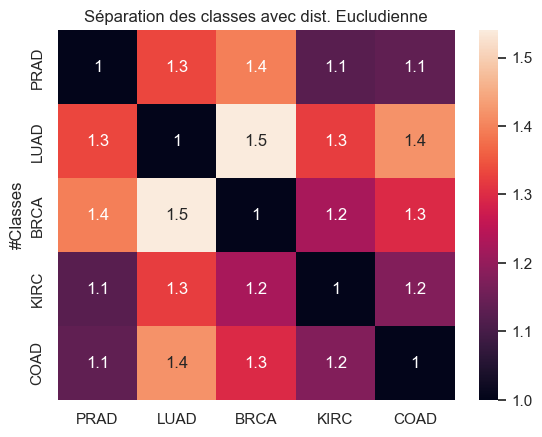

In [152]:
sns.heatmap(df_overlap_euclidienne, annot=True)
plt.title('Séparation des classes avec dist. Eucludienne')

### Overlap de la Distance Cosinus

In [153]:
dict_val_cosinus={}
print('Distance Cosinus: \n')
for classe_1 in list(df_dist_cosinus.index):
    L=[]
    for classe_2 in list(df_dist_cosinus.index):
        L.append(overlap(classe_1, classe_2, df_dist_cosinus))
    dict_val_cosinus.update({classe_1:L})
dict_val_cosinus.update({'#Classes':list(df_dist_cosinus.index)})
df_overlap_cosinus = pd.DataFrame(dict_val_cosinus)
df_overlap_cosinus=df_overlap_cosinus.set_index('#Classes')
df_overlap_cosinus.head()

Distance Cosinus: 


PRAD   LUAD   BRCA   KIRC   COAD
#Classes                                   
PRAD      1.000  1.929  2.077  1.310  1.225
LUAD      1.929  1.000  2.636  1.844  1.893
BRCA      2.077  2.636  1.000  1.553  1.656
KIRC      1.310  1.844  1.553  1.000  1.350
COAD      1.225  1.893  1.656  1.350  1.000

### HeatMap du Overlap de la Distance Cosinus

Text(0.5, 1.0, 'Séparation des classes avec distance Cosinus')

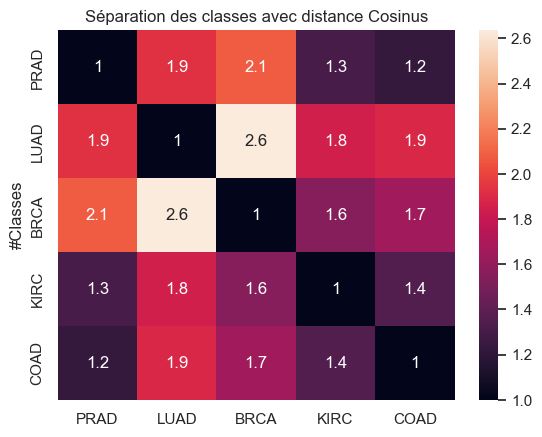

In [156]:
sns.heatmap(df_overlap_cosinus, annot=True)
plt.title('Séparation des classes avec distance Cosinus')

### Overlap de la Distance Mahalanobis

In [157]:
dict_val_mahala={}
print('Distance Mahalanobis: \n')
for classe_1 in list(df_dist_mahala.index):
    L=[]
    for classe_2 in list(df_dist_mahala.index):
        L.append(overlap(classe_1, classe_2, df_dist_mahala))
    dict_val_mahala.update({classe_1:L})
dict_val_mahala.update({'#Classes':list(df_dist_mahala.index)})
df_overlap_mahala = pd.DataFrame(dict_val_mahala)
df_overlap_mahala=df_overlap_mahala.set_index('#Classes')
df_overlap_mahala.head()

Distance Mahalanobis: 


PRAD   LUAD   BRCA   KIRC  COAD
#Classes                                  
PRAD      1.000  0.417  0.806  0.340   inf
LUAD      0.417  1.000  1.054  0.519   inf
BRCA      0.806  1.054  1.000  0.920   inf
KIRC      0.340  0.519  0.920  1.000   inf
COAD        inf    inf    inf    inf   1.0

### HeatMap du Overlap de la Distance Mahalanobis

Text(0.5, 1.0, 'Séparation des classes avec dist. Mahalanobis')

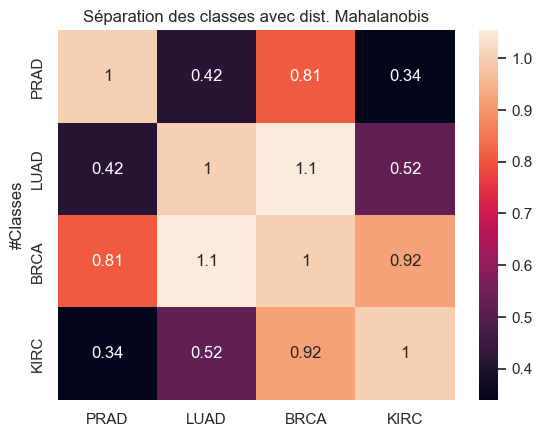

In [159]:
df_overlap_mahala.head()
sns.heatmap(df_overlap_mahala.drop(['COAD'], axis=1)[:4], annot=True)
plt.title('Séparation des classes avec dist. Mahalanobis')

# Méthode 2: Avec visualidation des Données


## Variables choisies: 'gene_1' et 'gene_2'

### Affichage des distributions des différentes classes

#### Affichages des deux gènes ensembles

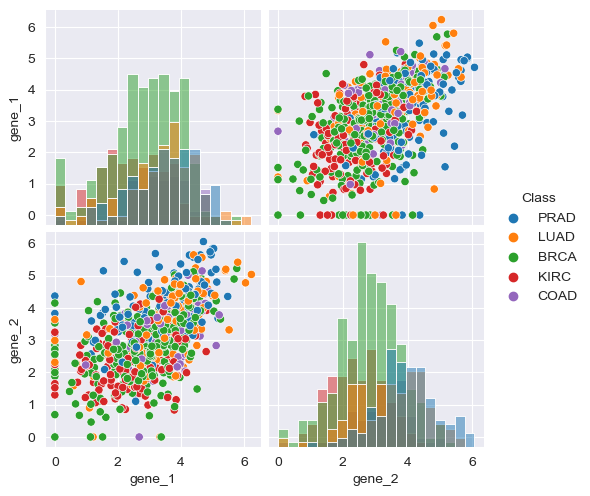

In [102]:
data_graphe = Full_Data[['gene_1', 'gene_2', 'Class']]
sns.pairplot(data_graphe, hue='Class', diag_kind='hist')
plt.show()

Affichage 1 de la gène_1

Text(0.5, 1.0, 'Scatter Plot avec Courbes de Distribution par Classe')

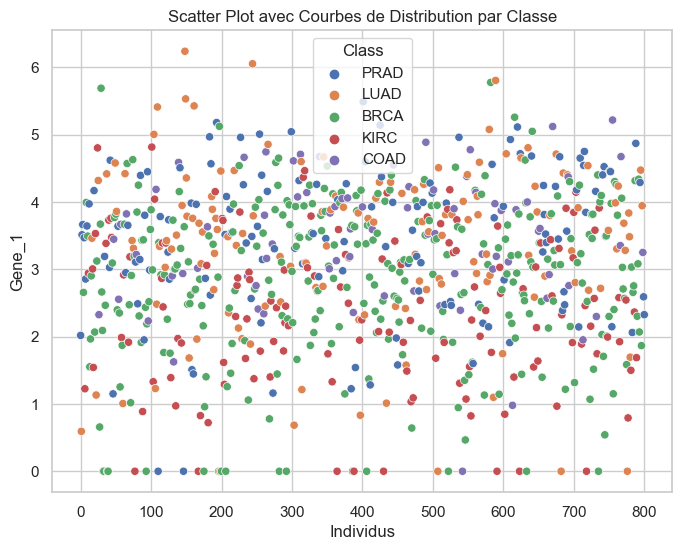

In [103]:
sns.set(style="whitegrid") # Style de fond 
plt.figure(figsize=(8, 6)) # Ajustez la taille de la figure si nécessaire 
scatter_plot = sns.scatterplot(data=data_graphe, x=data_graphe.index, y='gene_1', hue="Class") # Ajoutez des courbes de distribution pour chaque classe 
# Ajoutez des étiquettes d'axe et un titre 
plt.xlabel('Individus')
plt.ylabel('Gene_1')
plt.title('Scatter Plot avec Courbes de Distribution par Classe')

Affichage 2 de la gène_1

Text(0.5, 1.0, 'Scatter Plot avec Courbes de Distribution par Classe')

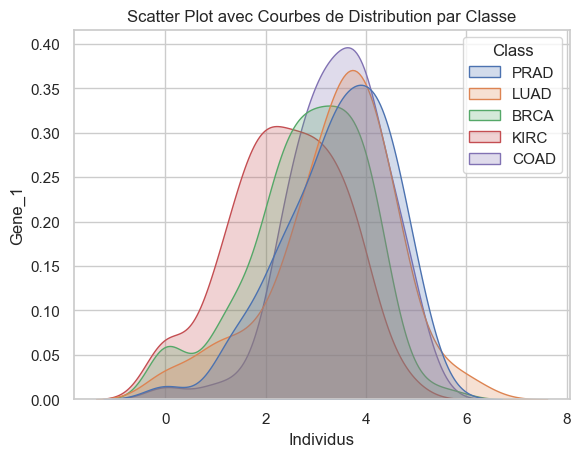

In [104]:
sns.kdeplot(data = data_graphe, x='gene_1', hue='Class', fill=True, common_norm=False)
plt.xlabel('Individus')
plt.ylabel('Gene_1')
plt.title('Scatter Plot avec Courbes de Distribution par Classe')

Affichage 3 de la gène_1 (Affichage 1 + Affichage 2)

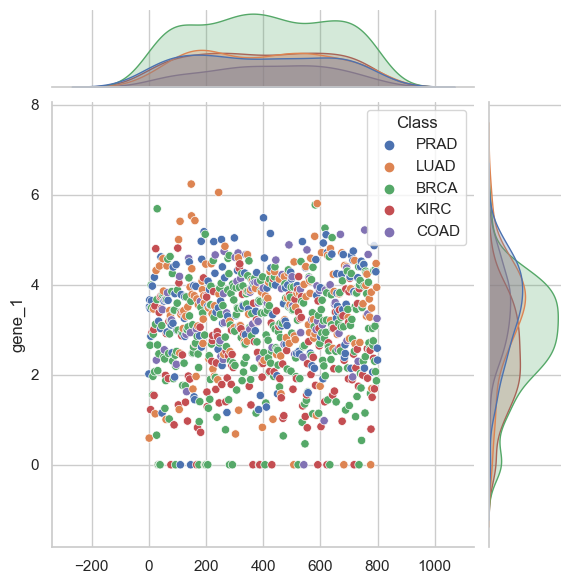

In [105]:
sns.jointplot(data=data_graphe, x=data_graphe.index, y='gene_1', hue='Class')

Affichage 1 de la gène_2

Text(0.5, 1.0, 'Scatter Plot avec Courbes de Distribution par Classe')

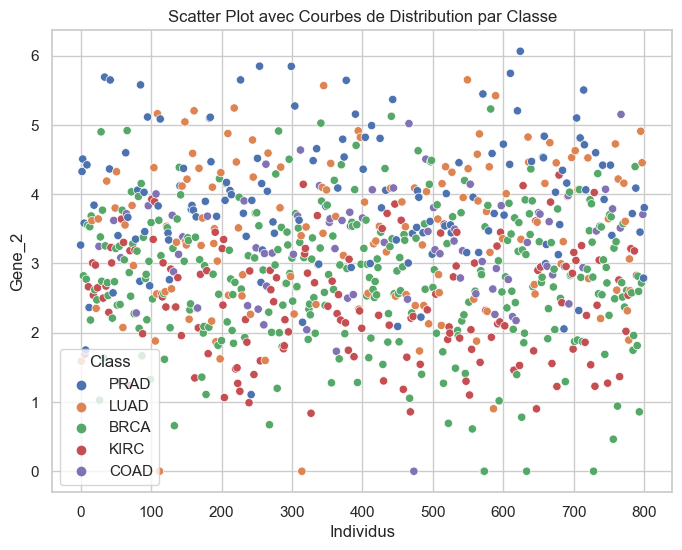

In [106]:
sns.set(style="whitegrid") # Style de fond 
plt.figure(figsize=(8, 6)) # Ajustez la taille de la figure si nécessaire 
scatter_plot = sns.scatterplot(data=data_graphe, x=data_graphe.index, y='gene_2', hue="Class") # Ajoutez des courbes de distribution pour chaque classe 
# Ajoutez des étiquettes d'axe et un titre 
plt.xlabel('Individus')
plt.ylabel('Gene_2')
plt.title('Scatter Plot avec Courbes de Distribution par Classe')

Affichage 2 de la gène_2

Text(0.5, 1.0, 'Scatter Plot avec Courbes de Distribution par Classe')

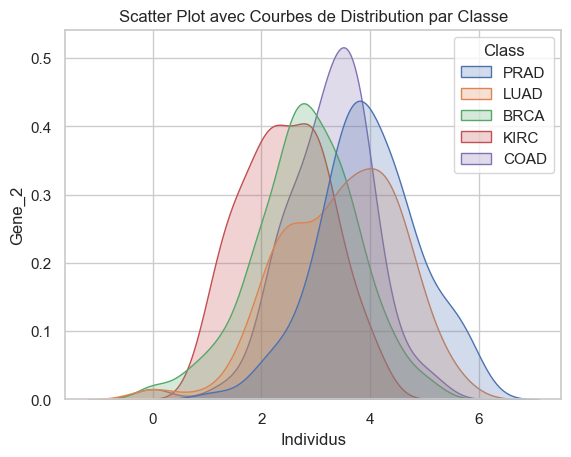

In [107]:
sns.kdeplot(data = data_graphe, x='gene_2', hue='Class', fill=True, common_norm=False)
plt.xlabel('Individus')
plt.ylabel('Gene_2')
plt.title('Scatter Plot avec Courbes de Distribution par Classe')

Affichage 3 de la gène_2 (Affichage 1 + Affichage 2)

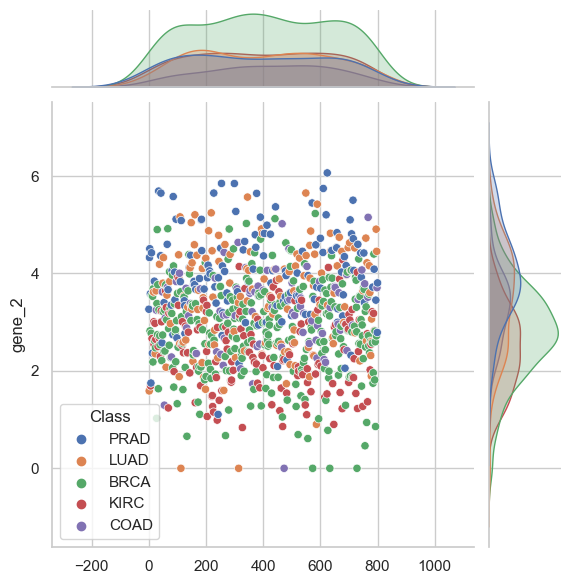

In [108]:
sns.jointplot(data=data_graphe, x=data_graphe.index, y='gene_2', hue='Class')

## Affichage conjoint des paires de classe

### Variable 1 : Gène_1

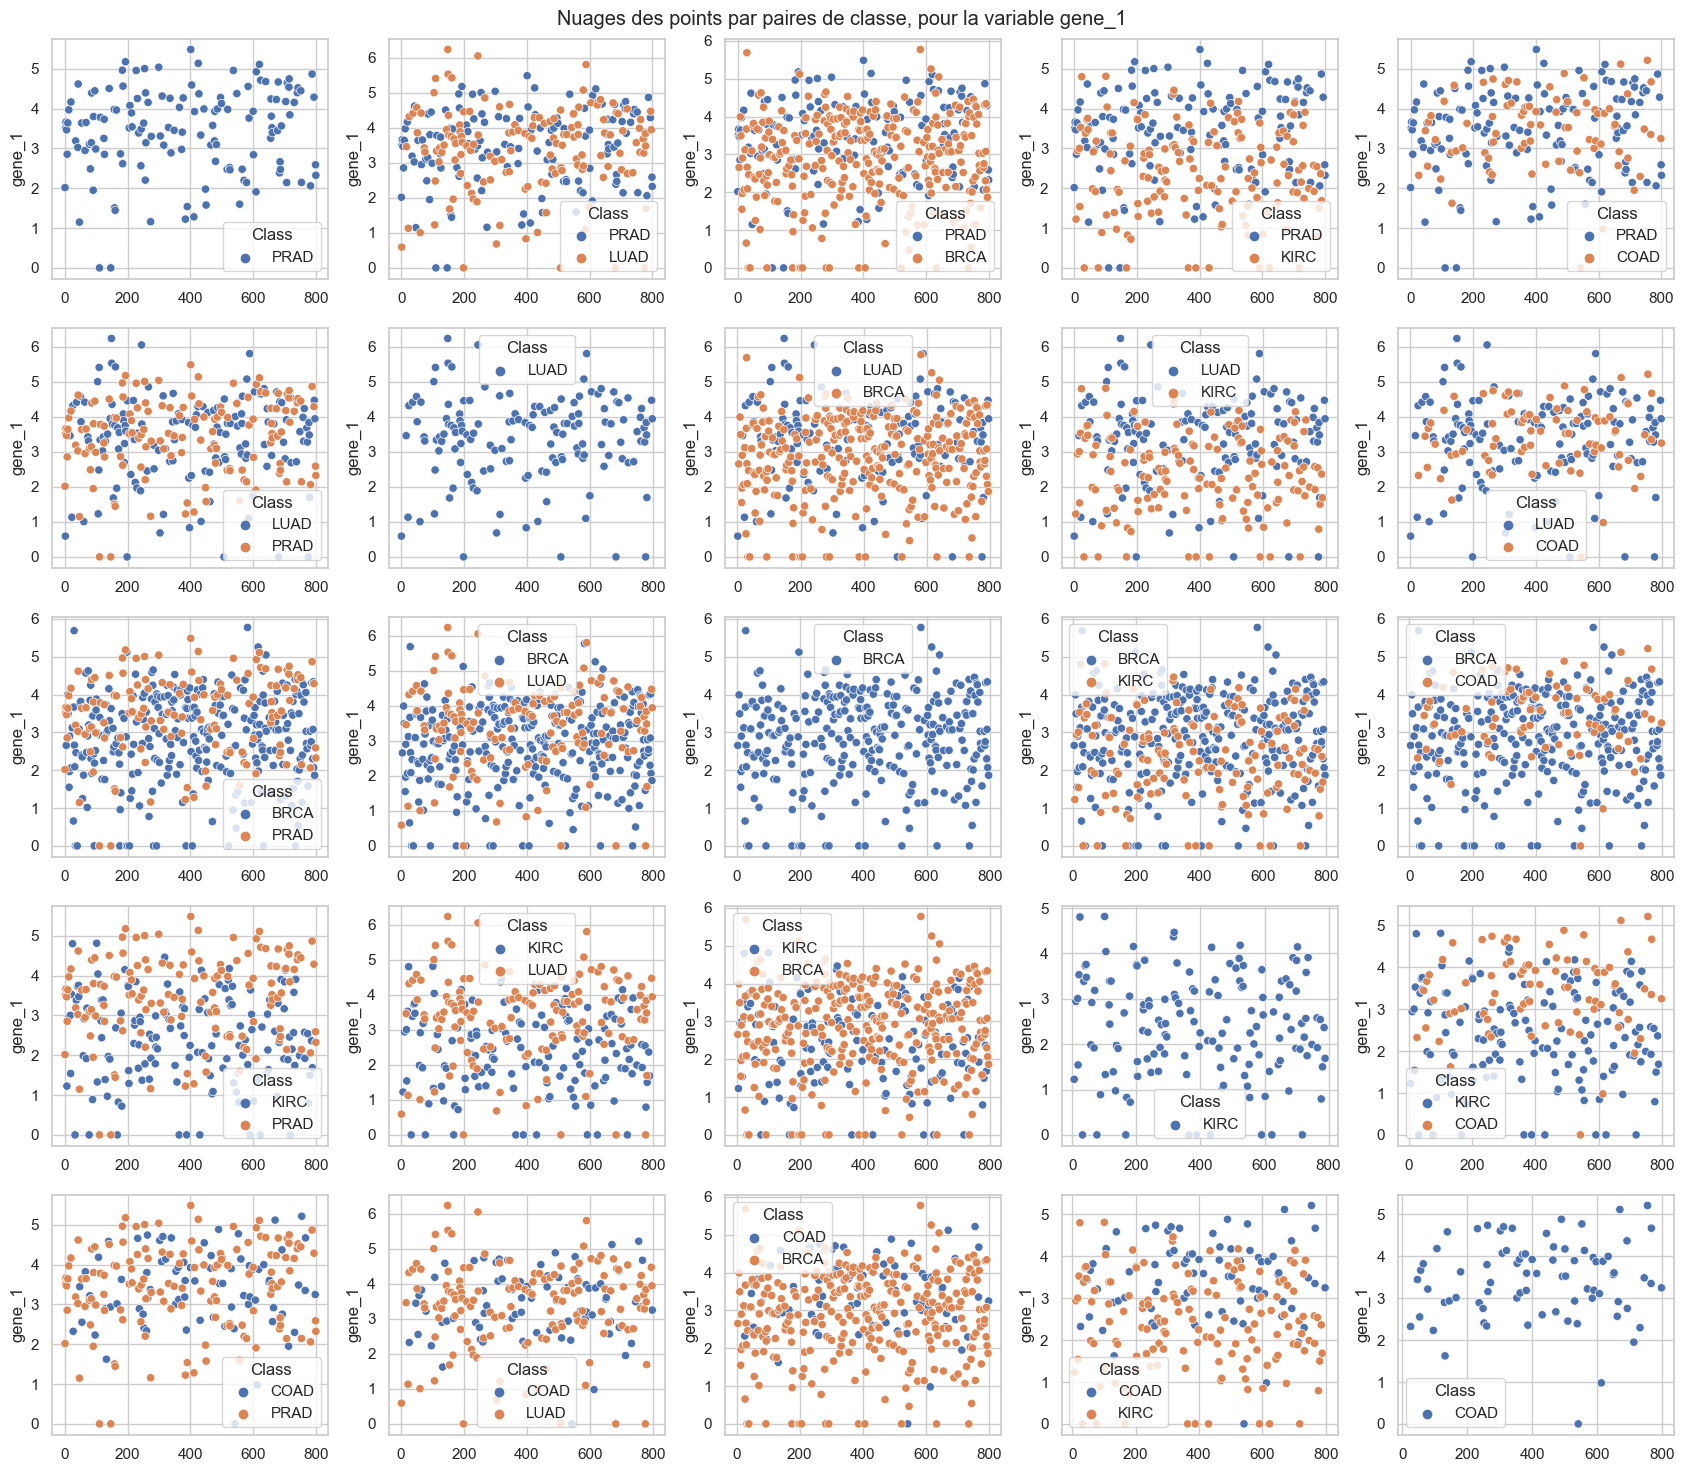

In [135]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(17, 15))
plt.suptitle("Nuages des points par paires de classe, pour la variable gene_1")
i=0
for data_1 in Data_by_classe:
    j=0
    for data_2 in Data_by_classe:
        data_graphe = pd.concat([data_1[['gene_1', 'gene_2', 'Class']],data_2[['gene_1', 'gene_2', 'Class']]], axis=0, sort=False)
        sns.scatterplot(data=data_graphe, x=data_graphe.index, y='gene_1', hue='Class', ax=axes[i,j])
        #axes[i, j].set_title(" & ".join(list(data_graphe["Class"].unique())))
        j+=1
    i+=1
# Ajustez l'espacement entre les graphiques
plt.tight_layout()

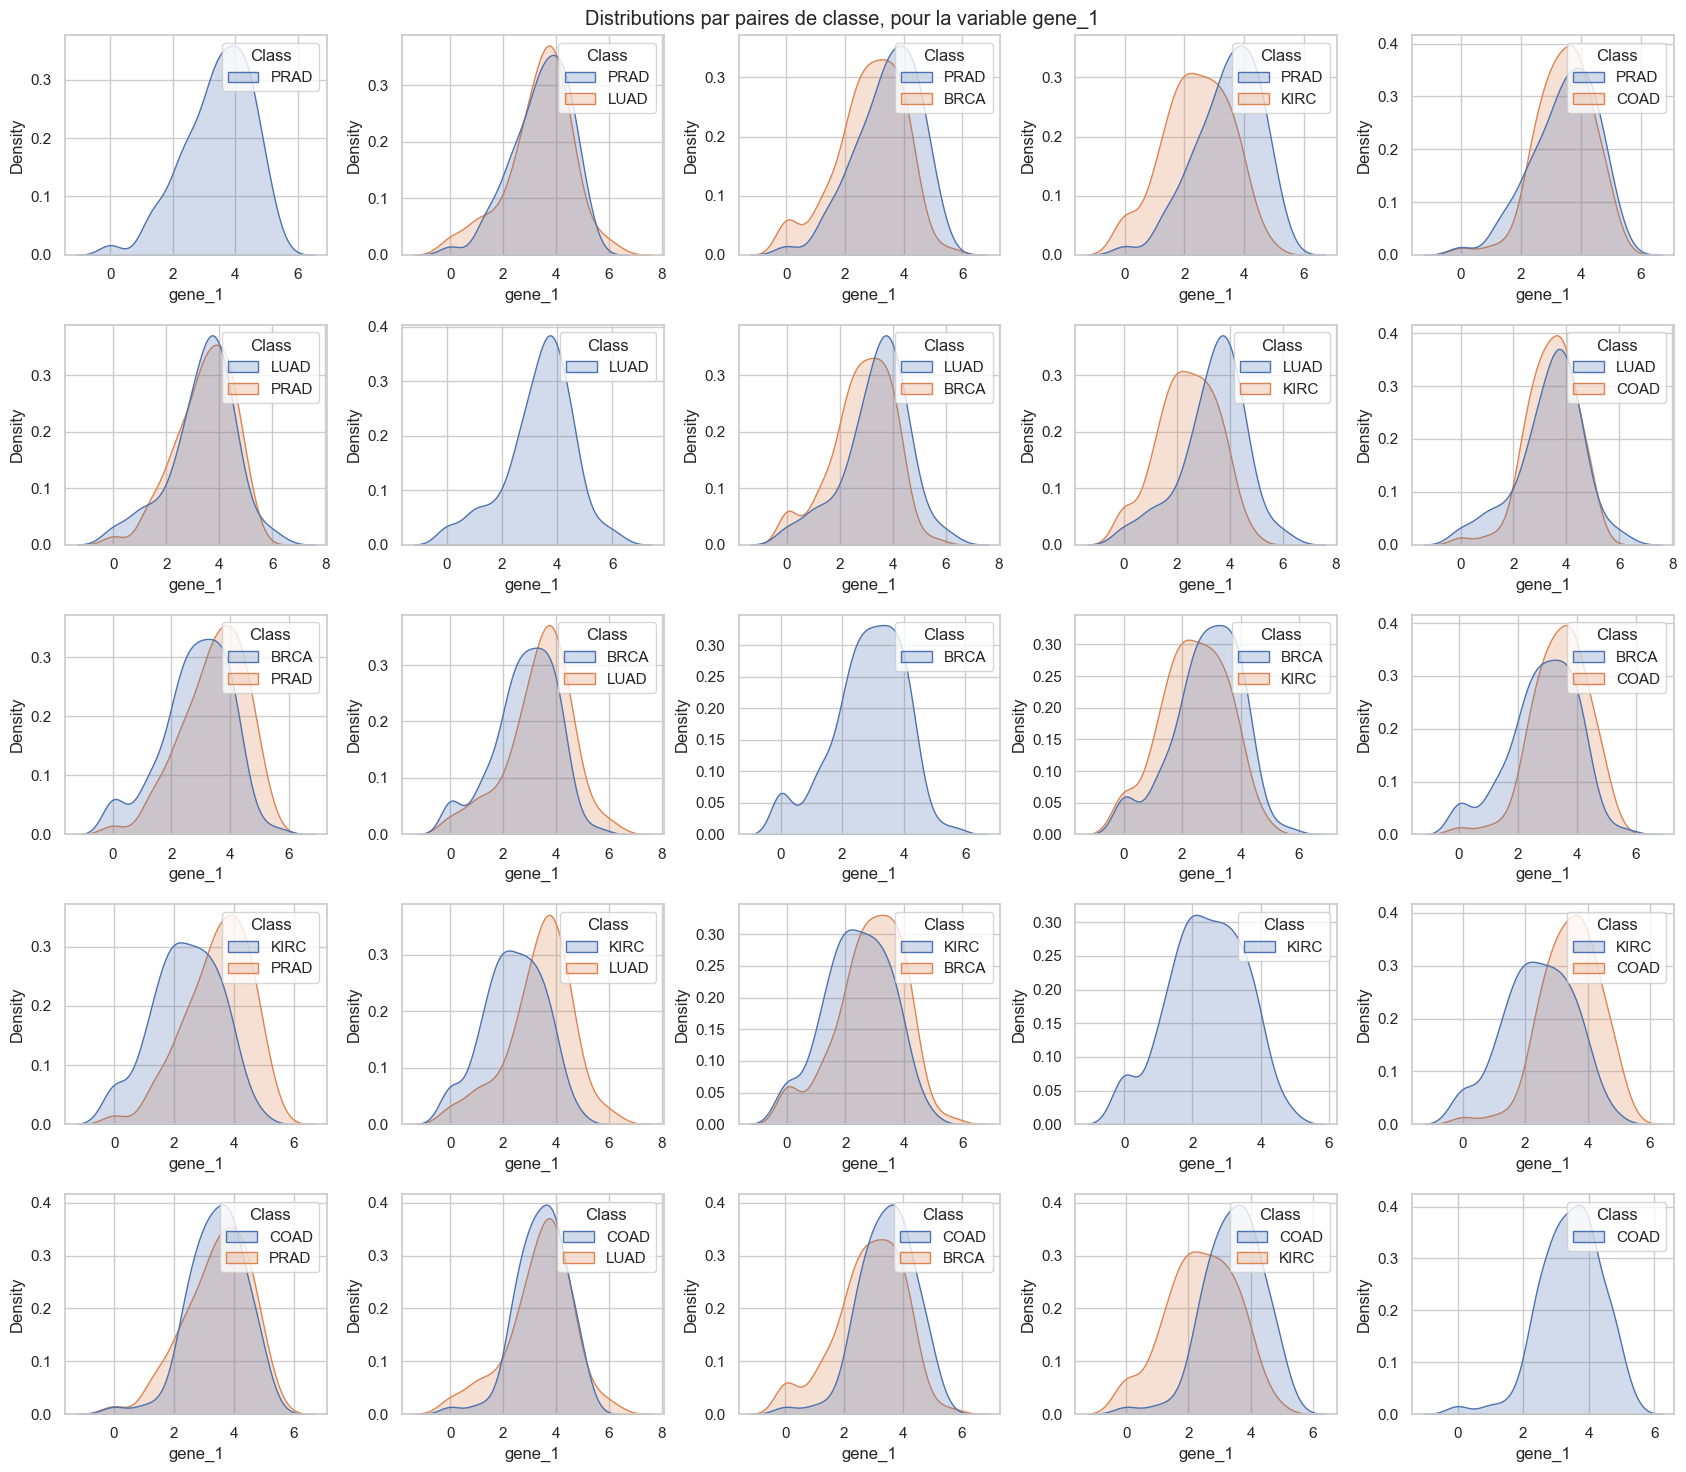

In [136]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(17, 15))
plt.suptitle("Distributions par paires de classe, pour la variable gene_1")
i=0
for data_1 in Data_by_classe:
    j=0
    for data_2 in Data_by_classe:
        data_graphe = pd.concat([data_1[['gene_1', 'gene_2', 'Class']],data_2[['gene_1', 'gene_2', 'Class']]], axis=0, sort=False)
        sns.kdeplot(data = data_graphe, x='gene_1', hue='Class', fill=True, common_norm=False,ax=axes[i,j])
        j+=1
    i+=1
# Ajustez l'espacement entre les graphiques
plt.tight_layout()

### Variable 2 : Gène_2

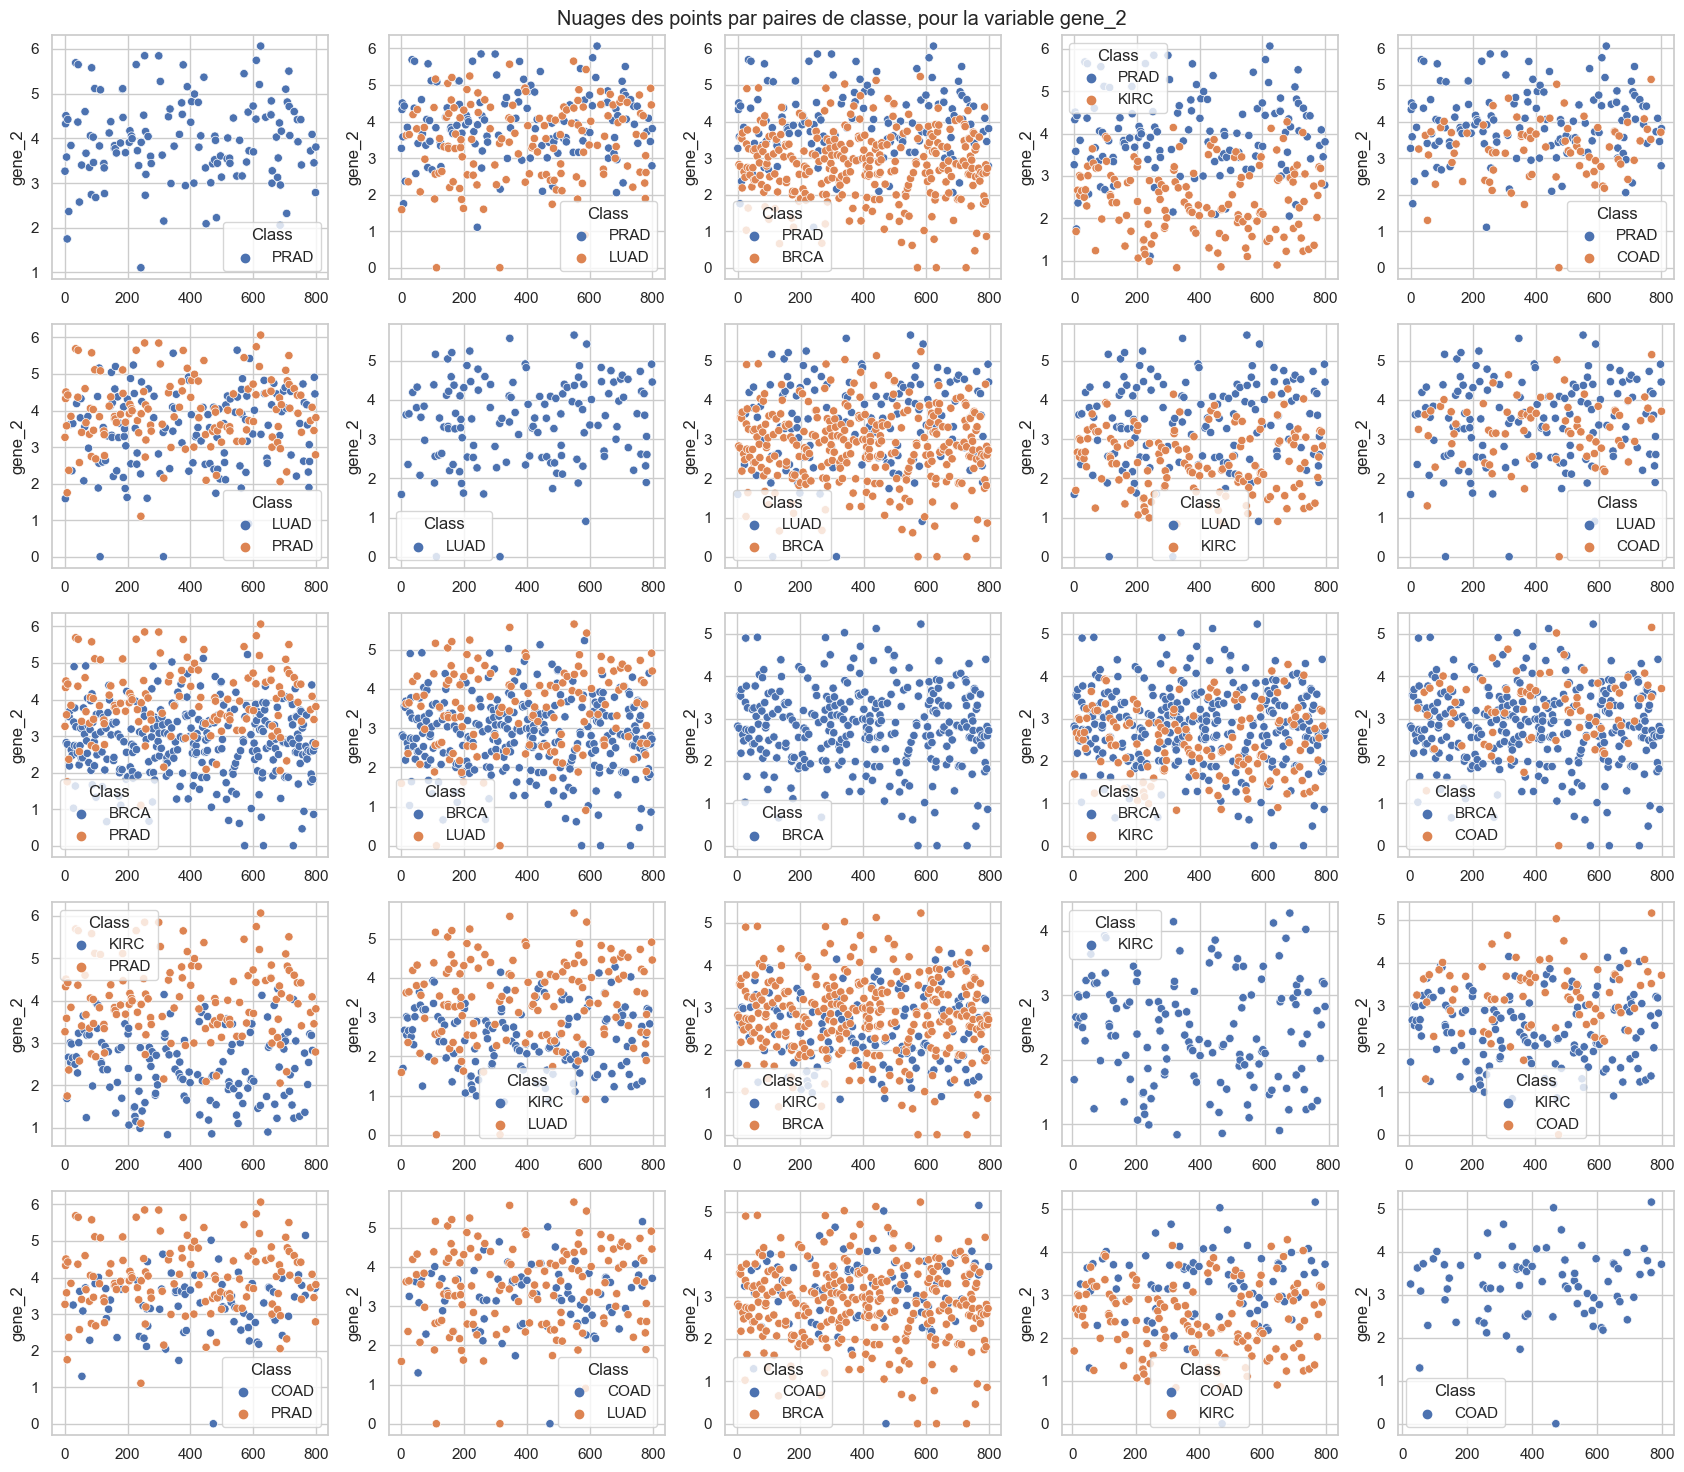

In [137]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(17, 15))
plt.suptitle("Nuages des points par paires de classe, pour la variable gene_2")
i=0
for data_1 in Data_by_classe:
    j=0
    for data_2 in Data_by_classe:
        data_graphe = pd.concat([data_1[['gene_1', 'gene_2', 'Class']],data_2[['gene_1', 'gene_2', 'Class']]], axis=0, sort=False)
        sns.scatterplot(data=data_graphe, x=data_graphe.index, y='gene_2', hue='Class', ax=axes[i,j])
        #axes[i, j].set_title(" & ".join(list(data_graphe["Class"].unique())))
        j+=1
    i+=1
# Ajustez l'espacement entre les graphiques
plt.tight_layout()

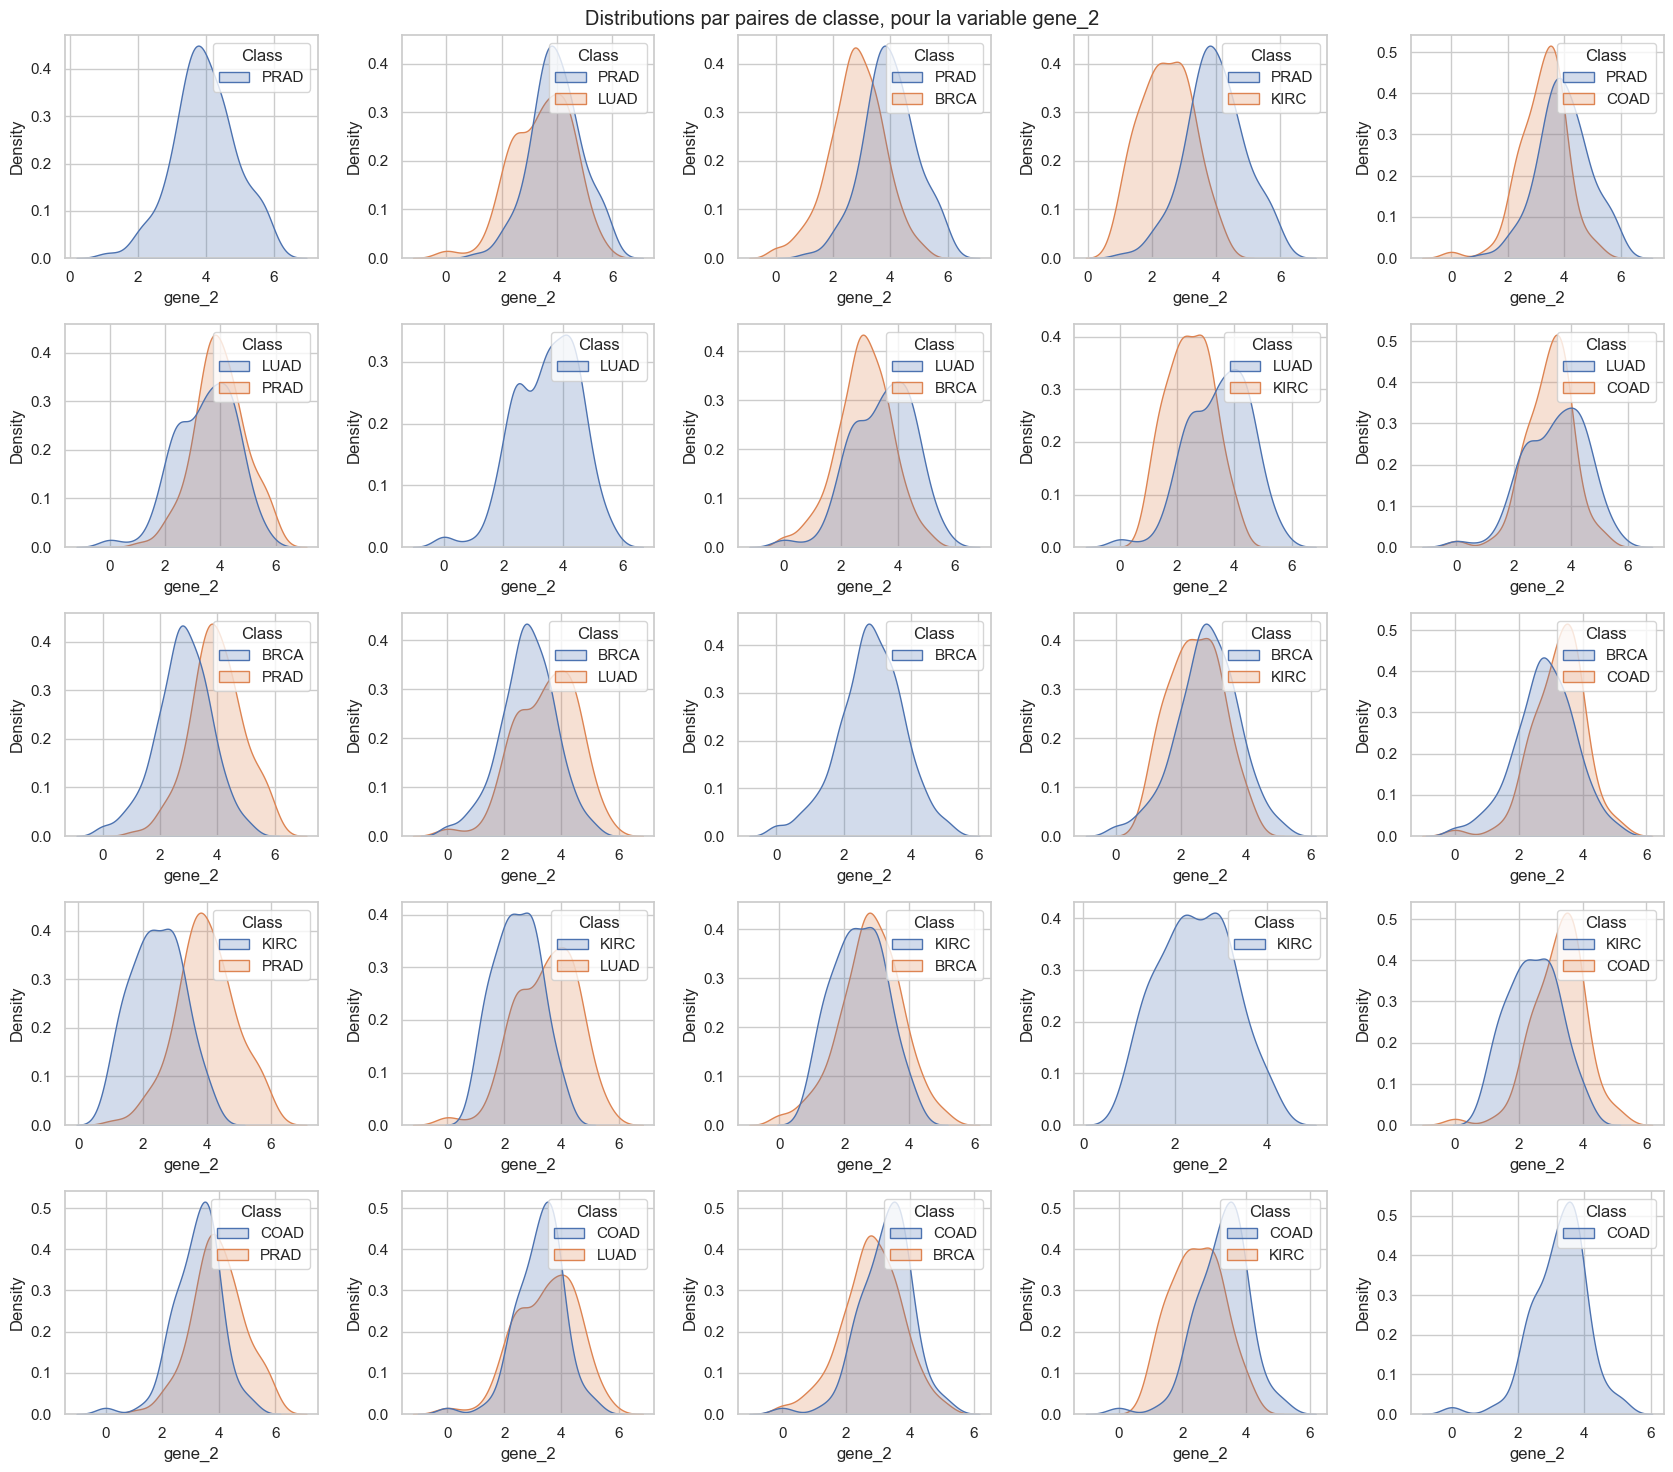

In [138]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(17, 15))
plt.suptitle("Distributions par paires de classe, pour la variable gene_2")
i=0
for data_1 in Data_by_classe:
    j=0
    for data_2 in Data_by_classe:
        data_graphe = pd.concat([data_1[['gene_1', 'gene_2', 'Class']],data_2[['gene_1', 'gene_2', 'Class']]], axis=0, sort=False)
        sns.kdeplot(data = data_graphe, x='gene_2', hue='Class', fill=True, common_norm=False,ax=axes[i,j])
        j+=1
    i+=1
# Ajustez l'espacement entre les graphiques
plt.tight_layout()

# Transformations ACP, TSNE et UMAP

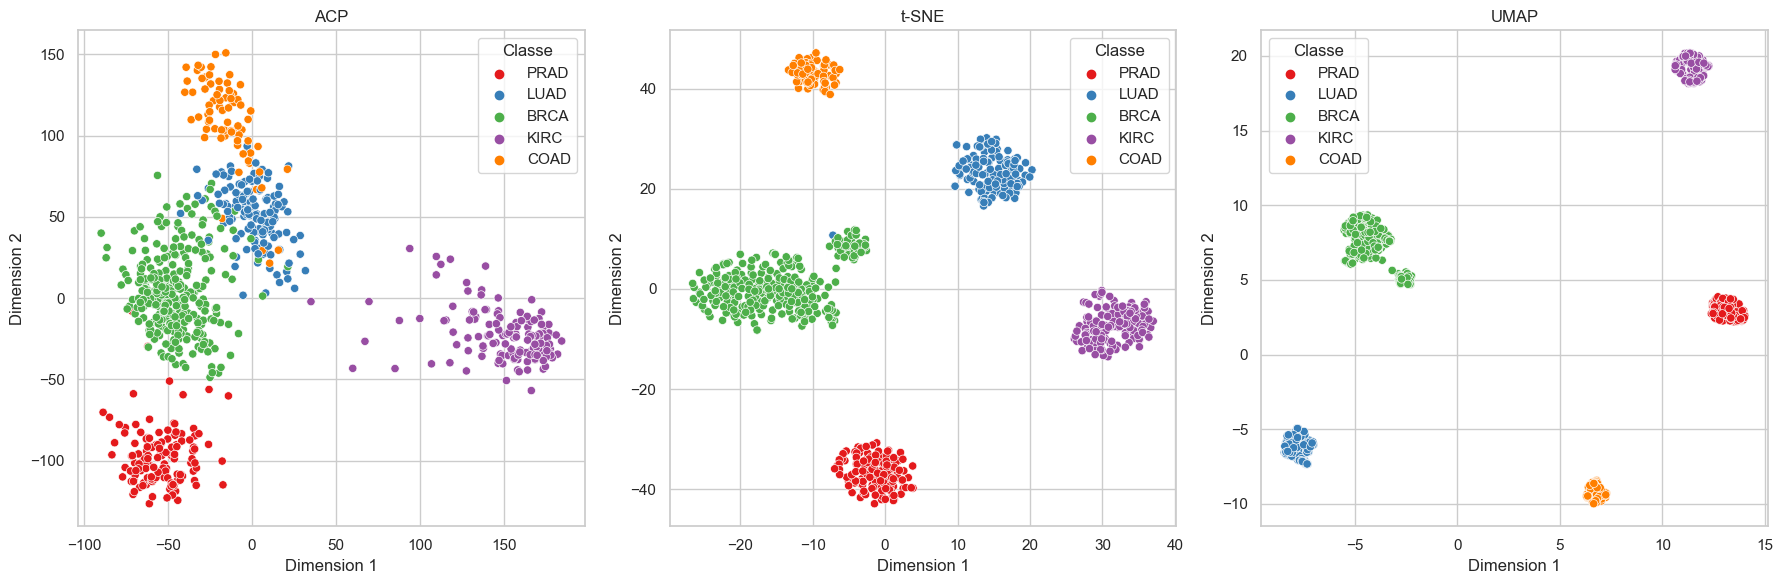

In [139]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP

X = Full_Data.drop('Class', axis=1)
y = Full_Data['Class']

# Réaliser une ACP (Analyse en Composantes Principales)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Réaliser une t-SNE (t-Distributed Stochastic Neighbor Embedding)
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

# Réaliser une UMAP (Uniform Manifold Approximation and Projection)
umap = UMAP(n_components=2)
X_umap = umap.fit_transform(X)

# Créer un DataFrame pandas avec les résultats
pca_df = pd.DataFrame(data={'Dimension 1': X_pca[:, 0], 'Dimension 2': X_pca[:, 1], 'Classe': y})
tsne_df = pd.DataFrame(data={'Dimension 1': X_tsne[:, 0], 'Dimension 2': X_tsne[:, 1], 'Classe': y})
umap_df = pd.DataFrame(data={'Dimension 1': X_umap[:, 0], 'Dimension 2': X_umap[:, 1], 'Classe': y})

# Tracer les résultats avec séparation des classes
plt.figure(figsize=(18, 6))
plt.subplot(131)
sns.scatterplot(data=pca_df, x='Dimension 1', y='Dimension 2', hue='Classe', palette='Set1')
plt.title('ACP')

plt.subplot(132)
sns.scatterplot(data=tsne_df, x='Dimension 1', y='Dimension 2', hue='Classe', palette='Set1')
plt.title('t-SNE')

plt.subplot(133)
sns.scatterplot(data=umap_df, x='Dimension 1', y='Dimension 2', hue='Classe', palette='Set1')
plt.title('UMAP')

plt.tight_layout()
plt.show()

# FIN